In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model

In [16]:

training_path = r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\Fashion-dataset\train"

testing_path = r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\Fashion-dataset\test"

val_path = r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\val-set"

In [17]:

datagen_train = ImageDataGenerator(rescale =1./255, 
                                   rotation_range=30,
                                   horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale =1./255,
                                   rotation_range=30,
                                   horizontal_flip=True)

datagen_val = ImageDataGenerator(rescale =1./255,
                                   rotation_range=30,
                                   horizontal_flip=True)

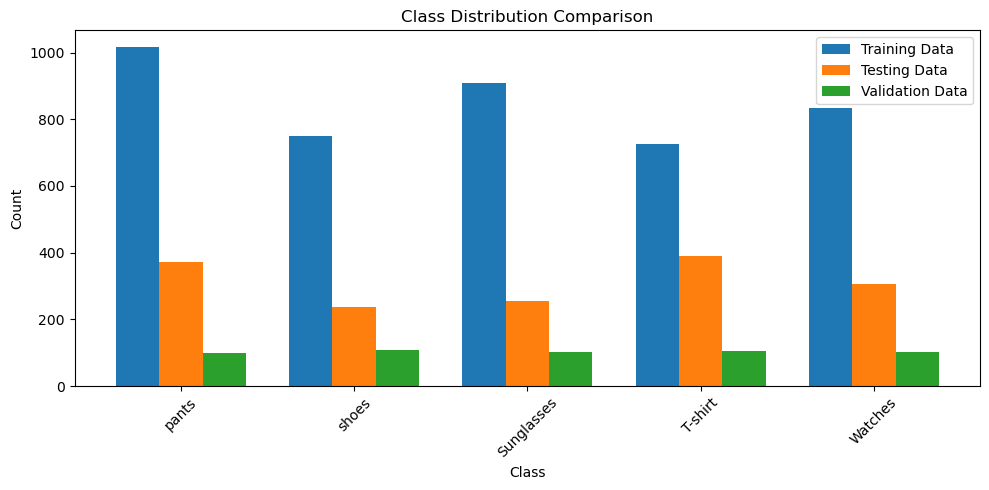

In [20]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def visualize_class_distribution(training_path, testing_path, val_path):
    # Get classes and their counts for each set
    train_classes = os.listdir(training_path)
    test_classes = os.listdir(testing_path)
    val_classes = os.listdir(val_path)
    
    train_class_counts = Counter()
    test_class_counts = Counter()
    val_class_counts = Counter()

    for class_name in train_classes:
        class_path = os.path.join(training_path, class_name)
        train_class_counts[class_name] = len(os.listdir(class_path))

    for class_name in test_classes:
        class_path = os.path.join(testing_path, class_name)
        test_class_counts[class_name] = len(os.listdir(class_path))

    for class_name in val_classes:
        class_path = os.path.join(val_path, class_name)
        val_class_counts[class_name] = len(os.listdir(class_path))

    # Plot class distribution for each set
    bar_width = 0.25
    index = np.arange(len(train_class_counts))

    plt.figure(figsize=(10, 5))
    plt.bar(index, train_class_counts.values(), bar_width, label='Training Data')
    plt.bar(index + bar_width, test_class_counts.values(), bar_width, label='Testing Data')
    plt.bar(index + 2*bar_width, val_class_counts.values(), bar_width, label='Validation Data')

    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution Comparison')
    plt.xticks(index + bar_width, train_class_counts.keys(), rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()



visualize_class_distribution(training_path, testing_path, val_path)


In [21]:

training_set = datagen_train.flow_from_directory(training_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')
test_set = datagen_test.flow_from_directory(testing_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')
val_set = datagen_val.flow_from_directory(val_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')


Found 4235 images belonging to 5 classes.
Found 1559 images belonging to 5 classes.
Found 517 images belonging to 5 classes.


In [22]:

model = Sequential()

model.add(Conv2D(64, (7, 7), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 103, 103, 128)     401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

In [23]:
model.fit(training_set, batch_size=64, epochs=5,validation_data= val_set) 

Epoch 1/5
67/67 [==============================] - 2863s 43s/step - loss: 1.5659 - accuracy: 0.2843 - val_loss: 1.6364 - val_accuracy: 0.1083
Epoch 2/5
67/67 [==============================] - 2559s 38s/step - loss: 1.4082 - accuracy: 0.4342 - val_loss: 1.9844 - val_accuracy: 0.1547
Epoch 3/5
67/67 [==============================] - 1810s 27s/step - loss: 1.2527 - accuracy: 0.4947 - val_loss: 2.2448 - val_accuracy: 0.0522
Epoch 4/5
67/67 [==============================] - 1812s 27s/step - loss: 1.1416 - accuracy: 0.5516 - val_loss: 2.3161 - val_accuracy: 0.0368
Epoch 5/5
67/67 [==============================] - 1866s 28s/step - loss: 1.0227 - accuracy: 0.6073 - val_loss: 2.7072 - val_accuracy: 0.0426


In [27]:
from keras.models import save_model


model.save(r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\model.h5")

In [29]:
model = load_model(r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\model.h5")

In [30]:

feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output)

In [31]:

feature_vectors = []
for i in range(len(training_set.filenames)):
    img_path = os.path.join(r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\Fashion-dataset\train", training_set.filenames[i])
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255., axis=0)
    feature_vector = feature_extraction_model.predict(img_array)
    feature_vectors.append((training_set.filenames[i], feature_vector.flatten()))

1/1 [==============================] - 1s 702ms/step


In [32]:

np.save('extracted_features2.npy', np.array(feature_vectors, dtype=object))

# Feature Extraction from Dataset

In [33]:

loaded_features = np.load('extracted_features2.npy', allow_pickle=True)

In [136]:
test_image_path = r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\shoes1.jpeg"

In [137]:


test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_arr = image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image_arr / 255., axis=0)
test_image_features = feature_extraction_model.predict(test_image_arr)

1/1 [==============================] - 1s 685ms/step


In [138]:
similarities = []
for filename, feature_vector in loaded_features:
    similarity = np.dot(test_image_features, feature_vector.T) / (np.linalg.norm(test_image_features) * np.linalg.norm(feature_vector))
    similarities.append((filename, similarity))

In [139]:
similarities.sort(key=lambda x: x[1], reverse=True)

# Plotting recommendations for our test image 

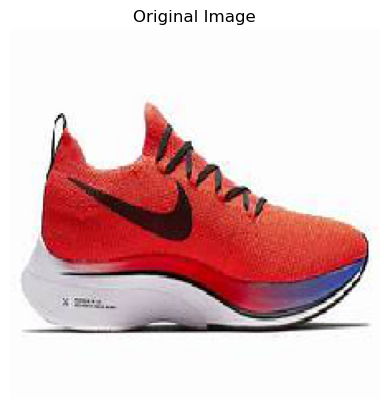

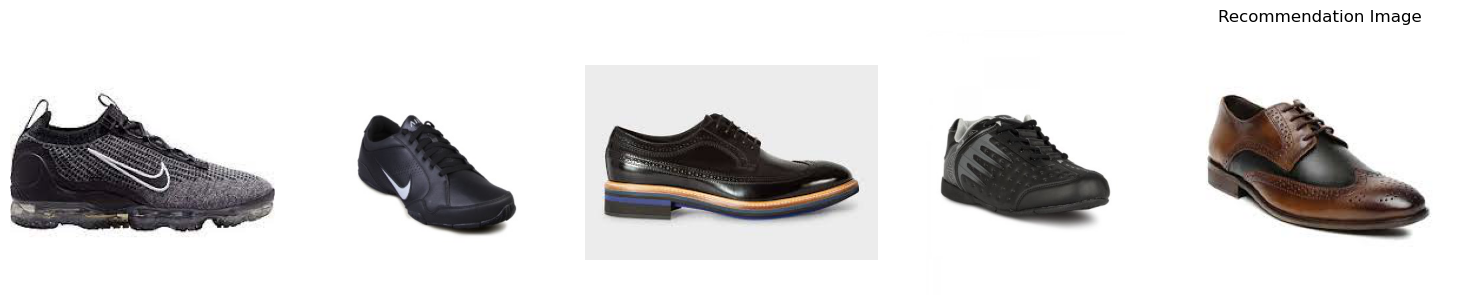

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


top_similarities = similarities[:5]


plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
plt.title("Recommendation Image")
for i, (filename, similarity) in enumerate(top_similarities):
    img_path = os.path.join(r"C:\Users\Pankaj\OneDrive\Desktop\PG-DBDA\Machine_Learning\ML_Project\Fashion-dataset\train", filename)
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
  
    axes[i].axis('off')

plt.tight_layout()
plt.show()
